<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


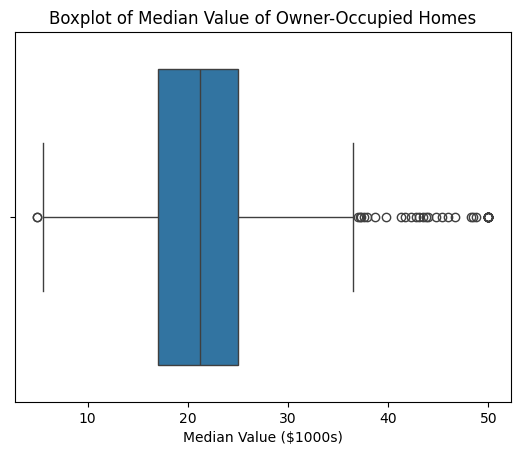

In [5]:
sns.boxplot(x='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value ($1000s)')
pyplot.show()

### EXPLAINATION: above is a boxplot of the median value of owner-occupied homes. The median is around 22.

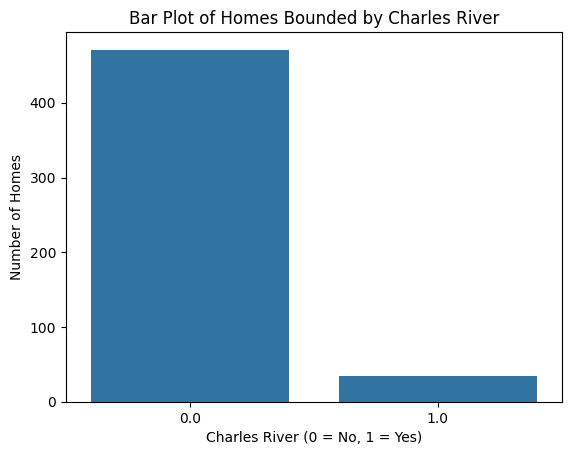

In [6]:
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Homes Bounded by Charles River')
pyplot.xlabel('Charles River (0 = No, 1 = Yes)')
pyplot.ylabel('Number of Homes')
pyplot.show()

### EXPLAINATION: above is a barplot of Homes Bounded by Charles River. Most homes is not bounded by the river

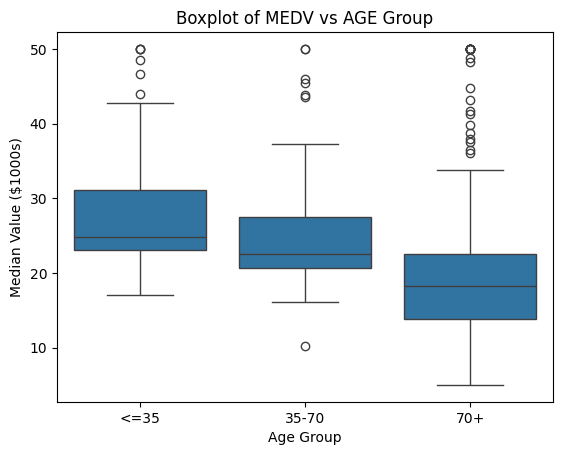

In [7]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '70+'])
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

### EXPLAINATION: above is a Boxplot of MEDV vs AGE Group. The trend is that as the age group inceases, the median value decreases

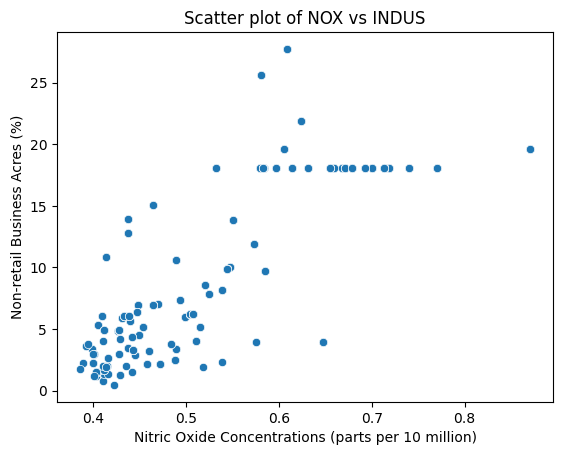

In [8]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter plot of NOX vs INDUS')
pyplot.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
pyplot.ylabel('Non-retail Business Acres (%)')
pyplot.show()

### EXPLAINATION: Scatter plot of NOX vs INDUS. We can see a linear correlation between the two

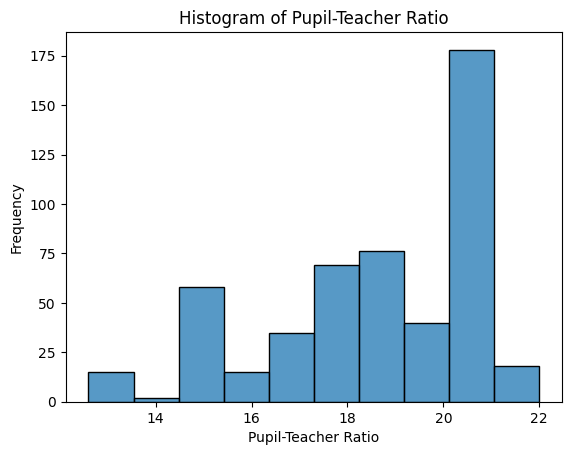

In [14]:
sns.histplot(boston_df['PTRATIO'], kde=False, bins=10)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

### EXPLAINATION: above is a Histogram of Pupil-Teacher Ratio. The trend is that as the ratio inceases, the frequency increases

Hypothesis:
𝐻0: No difference in the median value of homes based on proximity to the Charles River.
𝐻A: A difference exists in the median value of homes based on proximity to the Charles River.

In [10]:
river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = scipy.stats.ttest_ind(river, no_river)
print(f'T-statistic: {t_stat}, P-value: {p_val}')

if p_val < 0.05:
    print("Conclusion: There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("Conclusion: There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Conclusion: There is a significant difference in the median value of houses bounded by the Charles River.


Hypothesis:
𝐻0: No difference in median values across different age groups.
𝐻A: A difference in median values exists across different age groups.

In [11]:
group1 = boston_df[boston_df['AGE_group'] == '<=35']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '35-70']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '70+']['MEDV']

f_stat, p_val = scipy.stats.f_oneway(group1, group2, group3)
print(f'F-statistic: {f_stat}, P-value: {p_val}')

if p_val < 0.05:
    print("Conclusion: There is a significant difference in median home values across different age groups.")
else:
    print("Conclusion: There is no significant difference in median home values across different age groups.")

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Conclusion: There is a significant difference in median home values across different age groups.


Hypothesis:
𝐻0: No relationship between NOX and INDUS
𝐻A: A relationship exists between NOX and INDUS

In [12]:
corr, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Correlation: {corr}, P-value: {p_val}')

if p_val < 0.05:
    print(f"Conclusion: There is a significant relationship between NOX and INDUS with a correlation of {corr:.2f}.")
else:
    print("Conclusion: There is no significant relationship between NOX and INDUS.")

Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98
Conclusion: There is a significant relationship between NOX and INDUS with a correlation of 0.76.


In [13]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
p_val_DIS = model.pvalues['DIS']

if p_val_DIS < 0.05:
    coef_DIS = model.params['DIS']
    if coef_DIS > 0:
        print(f"Conclusion: There is a significant positive impact of distance to employment centers on home values. "
              f"An increase in distance results in an increase of ${coef_DIS:.2f} in median home value.")
    else:
        print(f"Conclusion: There is a significant negative impact of distance to employment centers on home values. "
              f"An increase in distance results in a decrease of ${-coef_DIS:.2f} in median home value.")
else:
    print("Conclusion: Distance to employment centers does not have a significant impact on home values.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        00:35:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0